In [1]:
import ete2
import numpy as np
import matplotlib.pyplot as plt
import re
%pylab inline

No module named MySQLdb
No module named PyQt4.QtGui
Populating the interactive namespace from numpy and matplotlib


 MySQLdb module could not be loaded
Treeview module could not be loaded


In [2]:
nw = ("((((((801940:0.16748,3825327:0.36897):0.07831,1928988:0.27799)'p__Crenarchaeota':0.04405,"
      "(4455990:0.14403,1128285:0.14461):0.16704):0.01855,823009:0.3881):0.01587,"
      "(3770699:0.60035,426860:0.28962)'c__[Parvarchaea]':0.07841)'k__Archaea':0.31772,"
      "((3761685:0.18326,4423155:0.5605):0.07543,(((((4391683:0.26125,(4336814:0.35428,"
      "(((3190878:0.36049,4452949:0.08994):0.12795,4251079:0.19473):0.02384,"
      "(2107103:0.54203,4363563:0.46236):0.06044):0.20722):0.05703):0.08253,229854:0.24026):0.02393,"
      "4459468:0.37727):0.01293,696036:0.63811):0.0212,"
      "(3779572:0.1464,4363260:0.11356)0.081:0.30451):0.09868):0.15861);")

First, here are the branch lengths, which we pull out with a regular expression.

[0.01293, 0.01587, 0.01855, 0.0212, 0.02384, 0.02393, 0.04405, 0.05703, 0.06044, 0.07543, 0.07831, 0.07841, 0.08253, 0.08994, 0.09868, 0.11356, 0.12795, 0.14403, 0.14461, 0.1464, 0.15861, 0.16704, 0.16748, 0.18326, 0.19473, 0.20722, 0.24026, 0.26125, 0.27799, 0.28962, 0.30451, 0.31772, 0.35428, 0.36049, 0.36897, 0.37727, 0.3881, 0.46236, 0.54203, 0.5605, 0.60035, 0.63811]
42 0.01293 0.162825 0.63811


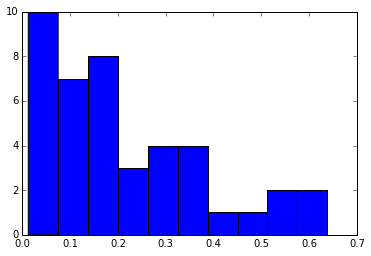

In [3]:
lengths = map(float,[e[1:] for e in re.findall(':\d\.\d+', nw)])
lengths.sort()
print lengths
print len(lengths), np.min(lengths), np.median(lengths), np.max(lengths)
_ = plt.hist(lengths)

Next, let's parse the newick file. Note that I'm purposefully using the default format here, because this is what I did in [my experiment](./experiments.ipynb) and it gave me misleading results.

In [4]:
t = ete2.Tree(nw)
t.describe()
list(t.traverse("postorder"))

Number of leaf nodes:	22
Number of internal nodes:	43
Rooted:	Yes
Most distant node:	3770699
Max. distance:	2.600350


[Tree node '801940' (0x10f1dd11),
 Tree node '3825327' (0x10f1dd19),
 Tree node 'NoName' (0x10f1dd21),
 Tree node '1928988' (0x10f1b629),
 Tree node 'NoName' (0x10f1dd71),
 Tree node '4455990' (0x10f1b611),
 Tree node '1128285' (0x10f1b619),
 Tree node 'NoName' (0x10f1dd2d),
 Tree node 'NoName' (0x10f1dd6d),
 Tree node '823009' (0x10f1b621),
 Tree node 'NoName' (0x10f1dd8d),
 Tree node '3770699' (0x10f1b105),
 Tree node '426860' (0x10f1b1a9),
 Tree node 'NoName' (0x10f1dd29),
 Tree node 'NoName' (0x10f1dd85),
 Tree node '3761685' (0x10f1b1f9),
 Tree node '4423155' (0x10f1b165),
 Tree node 'NoName' (0x10f1b1b1),
 Tree node '4391683' (0x10f1b13d),
 Tree node '4336814' (0x10f1b019),
 Tree node '3190878' (0x10f1abf1),
 Tree node '4452949' (0x10f1abf9),
 Tree node 'NoName' (0x10f1ab51),
 Tree node '4251079' (0x10f1abbd),
 Tree node 'NoName' (0x10f1b01d),
 Tree node '2107103' (0x10f1abe1),
 Tree node '4363563' (0x10f1ab15),
 Tree node 'NoName' (0x10f1ab65),
 Tree node 'NoName' (0x10f1b015),


There are four "branch lengths" that ete2 can't interpret. These are the ones that contain named internal nodes such as ``'p__Crenarchaeota':0.04405``. **Note that ``0.04405`` isn't in the list of branch lengths below - it's instead replaced by ``1.0``. This is a silent failure that can give very misleading results.**

[0.01293, 0.01587, 0.01855, 0.0212, 0.02384, 0.02393, 0.05703, 0.06044, 0.07543, 0.07831, 0.08253, 0.08994, 0.09868, 0.11356, 0.12795, 0.14403, 0.14461, 0.1464, 0.15861, 0.16704, 0.16748, 0.18326, 0.19473, 0.20722, 0.24026, 0.26125, 0.27799, 0.28962, 0.30451, 0.35428, 0.36049, 0.36897, 0.37727, 0.3881, 0.46236, 0.54203, 0.5605, 0.60035, 0.63811, 1.0, 1.0, 1.0, 1.0]
43 0.01293 0.18326 1.0


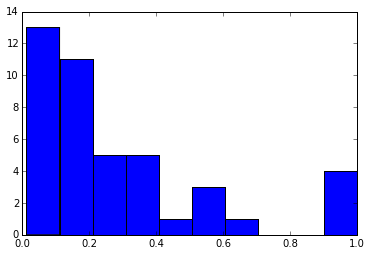

In [5]:
lengths = [n.dist for n in t.traverse("postorder")]
lengths.sort()
print lengths
print len(lengths), np.min(lengths), np.median(lengths), np.max(lengths)
_ = plt.hist(lengths)

If we instead use the correct format, the results are somewhat better...

In [6]:
t = ete2.Tree(nw, format=1)
list(t.traverse("postorder"))

[Tree node '801940' (0x10f7ee1d),
 Tree node '3825327' (0x10f7ee19),
 Tree node 'NoName' (0x10f7eebd),
 Tree node '1928988' (0x10f7ee09),
 Tree node ''p__Crenarchaeota'' (0x10f7f031),
 Tree node '4455990' (0x10f7eedd),
 Tree node '1128285' (0x10f7eee1),
 Tree node 'NoName' (0x10f7ee25),
 Tree node 'NoName' (0x10f7f029),
 Tree node '823009' (0x10f7eec5),
 Tree node 'NoName' (0x10f7f025),
 Tree node '3770699' (0x10f7ee0d),
 Tree node '426860' (0x10f7eeb9),
 Tree node ''c__' (0x10f7eed1),
 Tree node ''k__Archaea'' (0x10f7f079),
 Tree node '3761685' (0x10f7eecd),
 Tree node '4423155' (0x10f7ec7d),
 Tree node 'NoName' (0x10f1d5ad),
 Tree node '4391683' (0x10f7ec9d),
 Tree node '4336814' (0x10f7ec05),
 Tree node '3190878' (0x10f7e8bd),
 Tree node '4452949' (0x10f7e899),
 Tree node 'NoName' (0x10f7ec71),
 Tree node '4251079' (0x10f7e875),
 Tree node 'NoName' (0x10f7ec79),
 Tree node '2107103' (0x10f7e8cd),
 Tree node '4363563' (0x10f7e889),
 Tree node 'NoName' (0x10f7e891),
 Tree node 'NoName

[0.01293, 0.01587, 0.01855, 0.0212, 0.02384, 0.02393, 0.04405, 0.05703, 0.06044, 0.07543, 0.07831, 0.08253, 0.08994, 0.09868, 0.11356, 0.12795, 0.14403, 0.14461, 0.1464, 0.15861, 0.16704, 0.16748, 0.18326, 0.19473, 0.20722, 0.24026, 0.26125, 0.27799, 0.28962, 0.30451, 0.31772, 0.35428, 0.36049, 0.36897, 0.37727, 0.3881, 0.46236, 0.54203, 0.5605, 0.60035, 0.63811, 1.0, 1.0]
43 0.01293 0.16748 1.0


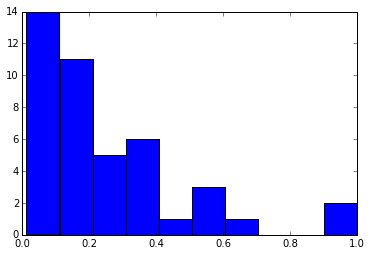

In [7]:
lengths = [n.dist for n in t.traverse("postorder")]
lengths.sort()
print lengths
print len(lengths), np.min(lengths), np.median(lengths), np.max(lengths)
_ = plt.hist(lengths)

But note that there are still two 1.0 branch lengths that are not in the input tree. There is a weird node name (``0.081:0.30451``) but ete2 does seem to be getting those right. Again, the ``1.0`` branch lengths can give very misleading results.